<center> <h1>
Análisis de ciencia de datos (TC-2004B)
<h4>
<center>César Guillermo Vázquez Alvarez A01197857
<center>IDM - Ingeniería de Ciencia de Datos y Matemáticas

# Aprendizaje Supervisado: Clasificadores (Diabetes)

## Fase 1. Exploración de los datos



In [1]:
# Quitar Warnings.
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [2]:
# Importar librerias
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Importar los datos
diabetes = pd.read_csv('diabetes.csv')

In [4]:
# Observar columnas en el conjunto de datos
diabetes.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Diabetes'],
      dtype='object')

In [5]:
# Examinar los datos
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
# Encontrar dimensiones del conjunto de datos
print("Diabetes data set dimensions : {}".format(diabetes.shape))

Diabetes data set dimensions : (768, 9)


In [7]:
# Identificar el número de personas clasificadas con diabetes y sin diabetes. 1: con diabetes, 0: sin diabetes

diabetes.groupby('Diabetes').size()

Diabetes
0    500
1    268
dtype: int64

Diabetes
0    [[AxesSubplot(0.125,0.670278;0.215278x0.209722...
1    [[AxesSubplot(0.125,0.670278;0.215278x0.209722...
dtype: object

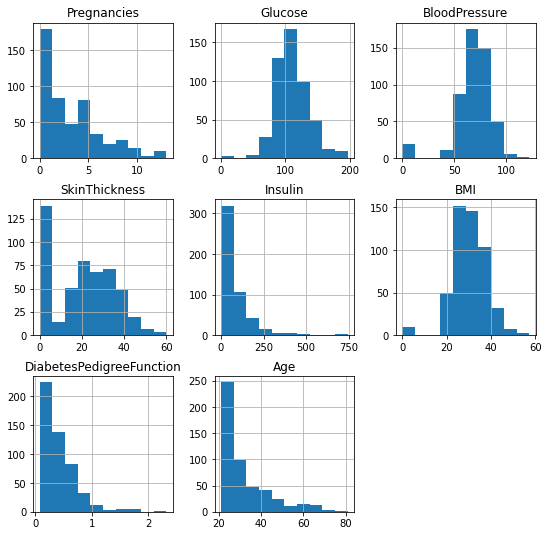

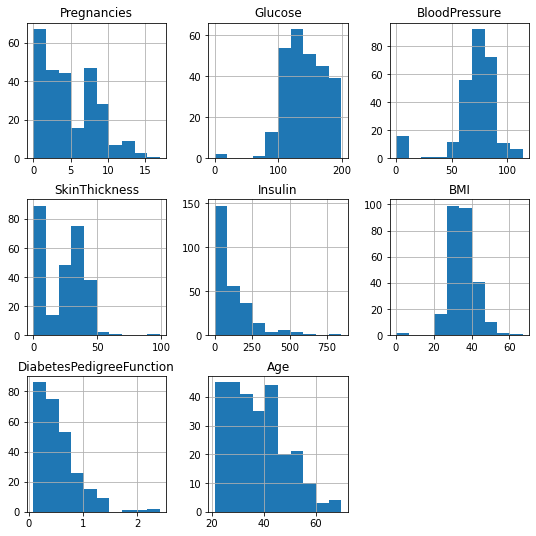

In [8]:
# Visualización de los datos
diabetes.groupby('Diabetes').hist(figsize=(9, 9))

## Fase 2. Limpieza de los datos



In [9]:
# Encontrar datos faltantes
diabetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Diabetes                    0
dtype: int64

In [10]:
# Encontrar datos nulos
diabetes.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Diabetes                    0
dtype: int64

In [11]:
# Encontrar valores atípicos según el histograma de 'BloodPreassure'

print("Total : ", diabetes[diabetes.BloodPressure == 0].shape[0])
print(diabetes[diabetes.BloodPressure == 0].groupby('Diabetes')['Age'].count())

Total :  35
Diabetes
0    19
1    16
Name: Age, dtype: int64


In [12]:
# Encontrar valores atípicos según el histograma de 'Glucose'
print("Total : ", diabetes[diabetes.Glucose == 0].shape[0])
print(diabetes[diabetes.Glucose == 0].groupby('Diabetes')['Age'].count())

Total :  5
Diabetes
0    3
1    2
Name: Age, dtype: int64


In [13]:
# Encontrar valores atípicos según el histograma de 'SkinThickness'
print("Total : ", diabetes[diabetes.SkinThickness == 0].shape[0])
print(diabetes[diabetes.SkinThickness == 0].groupby('Diabetes')['Age'].count())

Total :  227
Diabetes
0    139
1     88
Name: Age, dtype: int64


In [14]:
# Encontrar valores atípicos según el histograma de 'BMI'
print("Total : ", diabetes[diabetes.BMI == 0].shape[0])
print(diabetes[diabetes.BMI == 0].groupby('Diabetes')['Age'].count())

Total :  11
Diabetes
0    9
1    2
Name: Age, dtype: int64


In [15]:
# Encontrar valores atípicos según el histograma de 'Insulin'
print("Total : ", diabetes[diabetes.Insulin == 0].shape[0])
print(diabetes[diabetes.Insulin == 0].groupby('Diabetes')['Age'].count())

Total :  374
Diabetes
0    236
1    138
Name: Age, dtype: int64


In [16]:
# Remover las filas que tengan cero en 'BloodPreassure', 'BMI' y 'Glucose'
diabetes_mod = diabetes[(diabetes.BloodPressure != 0) & (diabetes.BMI != 0) & (diabetes.Glucose != 0)]
print(diabetes_mod.shape)

(724, 9)


## Fase 3. Ingeniería de características



In [17]:
# Separar el conjunto de datos en características (X) y la respuesta a predecir (y)
feature_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
X = diabetes_mod[feature_names]
y = diabetes_mod.Diabetes

## Fase 4. Selección del modelo



In [18]:
# Importar librerias y clasificadores
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [19]:
# Iniciar los clasificadores con sus parámetros determinados y añadir cada uno a la lista de modelos
models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('SVC', SVC()))
models.append(('LR', LogisticRegression()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('GNB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))
models.append(('GB', GradientBoostingClassifier()))

In [20]:
# Importar librerias para train/test split y k-fold cross-validation
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score # Para evaluar la precisión del modelo en el método train/test split

In [21]:
# Separar las características y respuesta
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = diabetes_mod.Diabetes, random_state=0)

In [22]:
# Ajustar cada modelo en un bucle y calcular la precisión del modelo respectivo usando el "accuracy_score".
names = []
scores = []
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))
    names.append(name)
tr_split = pd.DataFrame({'Name': names, 'Score': scores})
print(tr_split)

  Name     Score
0  KNN  0.729282
1  SVC  0.740331
2   LR  0.762431
3   DT  0.718232
4  GNB  0.734807
5   RF  0.773481
6   GB  0.773481


In [23]:
# Entrenar los modelos con 10 folds y calcular el promedio de la precisión 
names = []
scores = []
for name, model in models:
    
    kfold = KFold(n_splits=10) # kfold = KFold(n_splits=10, random_state=10) 
    score = cross_val_score(model, X, y, cv=kfold, scoring='accuracy').mean() 
        # Proporciona su propia interfaz de entrenamiento y cálculo de precisión

    names.append(name)
    scores.append(score)
kf_cross_val = pd.DataFrame({'Name': names, 'Score': scores})
print(kf_cross_val)

  Name     Score
0  KNN  0.719787
1  SVC  0.758581
2   LR  0.763889
3   DT  0.697660
4  GNB  0.757021
5   RF  0.769559
6   GB  0.775038


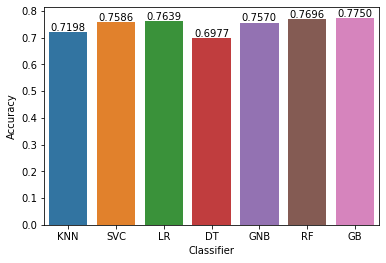

In [24]:
# Graficar las puntuaciones de precisión
axis = sns.barplot(x = 'Name', y = 'Score', data = kf_cross_val)
axis.set(xlabel='Classifier', ylabel='Accuracy')
for p in axis.patches:
    height = p.get_height()
    axis.text(p.get_x() + p.get_width()/2, height + 0.005, '{:1.4f}'.format(height), ha="center") 
    
plt.show()

## Aplicación del modelo de redes neuronales

Construiremos un modelo de red neuronal usando la libreria scikit-learn.

In [25]:
# Importamos 'MLPClassifier'
from sklearn.neural_network import MLPClassifier

In [26]:
# Crear una instancia del modelo establecida en tres capas.
mlp = MLPClassifier(hidden_layer_sizes=(8,8,8), activation='relu', solver='adam', max_iter=500)
# Se selecciona 'relu' como la función de activación 
    # ‘relu’, the rectified linear unit function, returns f(x) = max(0, x)
# Se selecciona 'adam' como solucionador para la optimización del peso
    # ‘adam’ refers to a stochastic gradient-based optimizer proposed by Kingma, Diederik, and Jimmy Ba

In [27]:
# Ajustar el modelo a los datos de entrenamiento     
mlp.fit(X_train,y_train)

MLPClassifier(hidden_layer_sizes=(8, 8, 8), max_iter=500)

In [28]:
# Generar predicciones sobre el conjunto de datos de entrenamiento y prueba
predict_train = mlp.predict(X_train)
predict_test = mlp.predict(X_test)

In [29]:
# Evaluación del rendimiento
# Importar módulos
from sklearn.metrics import classification_report,confusion_matrix

# Imprimir matriz de confusión y los resultados del informe de confusión sobre los datos de entrenamiento
print('Entrenamiento:')
print(confusion_matrix(y_train,predict_train))
print(classification_report(y_train,predict_train))

# Imprimir matriz de confusión y los resultados del informe de confusión sobre los datos de prueba
print('Prueba:')
print(confusion_matrix(y_test,predict_test))
print(classification_report(y_test,predict_test))

Entrenamiento:
[[330  26]
 [111  76]]
              precision    recall  f1-score   support

           0       0.75      0.93      0.83       356
           1       0.75      0.41      0.53       187

    accuracy                           0.75       543
   macro avg       0.75      0.67      0.68       543
weighted avg       0.75      0.75      0.72       543

Prueba:
[[103  16]
 [ 43  19]]
              precision    recall  f1-score   support

           0       0.71      0.87      0.78       119
           1       0.54      0.31      0.39        62

    accuracy                           0.67       181
   macro avg       0.62      0.59      0.58       181
weighted avg       0.65      0.67      0.65       181



## Preguntas

**¿Qué aspectos se revisaron para la preparación de datos?**

Primero se observaron los datos, despues se realizo una limpeza de los datos nulos y columnas que no heran necesarias para modelo.


**¿Qué cambios se hicieron?**

Se eliminaron los datos que no necesitabamos de la dataframe para despues utilizarlos en el modelo.


**¿Qué modelos de aprendizaje se probaron?**

Utilice un modelo Multi-layer Perceptron classifier con una función de activación relu y solucionador adam.


**Compara el resultado de todos los modelos. ¿Cuál es mejor?**

Por la naturaleza de los datos las redes neuronales son la mejor opción en este caso las "Multi-layer Perceptron classifier" probe otros activadores y solucionadores y los mejores si són relu y adam respectivamente.


## Conclusión

Me encantó ver el uso de las redes neuronales en la clase, y creo que como estudiante ha sido un gran beneficio aprender sobre estos complejos algoritmos. La capacidad de reconocer rápidamente patrones y sugerir conexiones entre ellos ha sido especialmente útil a la hora de estudiar para los exámenes y las tareas. También el poder aplicarlos estas redes neuronales en nuestras propias necesidades de un futuro en diferentes áreas de estudia, lo que ha sido emocionante y gratificante. Me encantaría aprender más sobre las redes neuronales y verlas utilizadas en más clases en el futuro.

La verdad el poder hacer este tipo de actividades me enriquecen en mi desarrollo tanto académico como laboral, y me siento muy comodo trabajando en estas actividades por que aprendo y pongo en practica lo visto en clase.

# Visualización de árboles de Decisión

Apartir de dós metodos diferentes visualizaremos el árbol de predicción de cáncer:

- Representar el árbol de decisión en texto impreso

- Visualizar árbol de decisión con graphviz

## Representar el árbol de decisión en texto impreso

In [30]:
# Arboles de decisión
from sklearn.tree import DecisionTreeClassifier
algoritmo = DecisionTreeClassifier(criterion = 'entropy')

# Entrenar el modelo
algoritmo.fit(X_train, y_train)

# Realizar una predicción
y_pred = algoritmo.predict(X_test)

In [31]:
# Importar librerias
#from sklearn.tree import export_text
from sklearn import tree


# Representar árbol de decisión en texto impreso
text_representation = tree.export_text(algoritmo)
print(text_representation)

|--- feature_1 <= 147.50
|   |--- feature_5 <= 26.30
|   |   |--- feature_6 <= 0.68
|   |   |   |--- class: 0
|   |   |--- feature_6 >  0.68
|   |   |   |--- feature_6 <= 0.71
|   |   |   |   |--- class: 1
|   |   |   |--- feature_6 >  0.71
|   |   |   |   |--- class: 0
|   |--- feature_5 >  26.30
|   |   |--- feature_7 <= 30.50
|   |   |   |--- feature_1 <= 116.50
|   |   |   |   |--- feature_5 <= 30.95
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_5 >  30.95
|   |   |   |   |   |--- feature_5 <= 45.40
|   |   |   |   |   |   |--- feature_5 <= 38.30
|   |   |   |   |   |   |   |--- feature_6 <= 0.78
|   |   |   |   |   |   |   |   |--- feature_5 <= 31.10
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |--- feature_5 >  31.10
|   |   |   |   |   |   |   |   |   |--- feature_1 <= 89.50
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |--- feature_1 >  89.50
|   |   |   |   |   |   |   |   |   |  

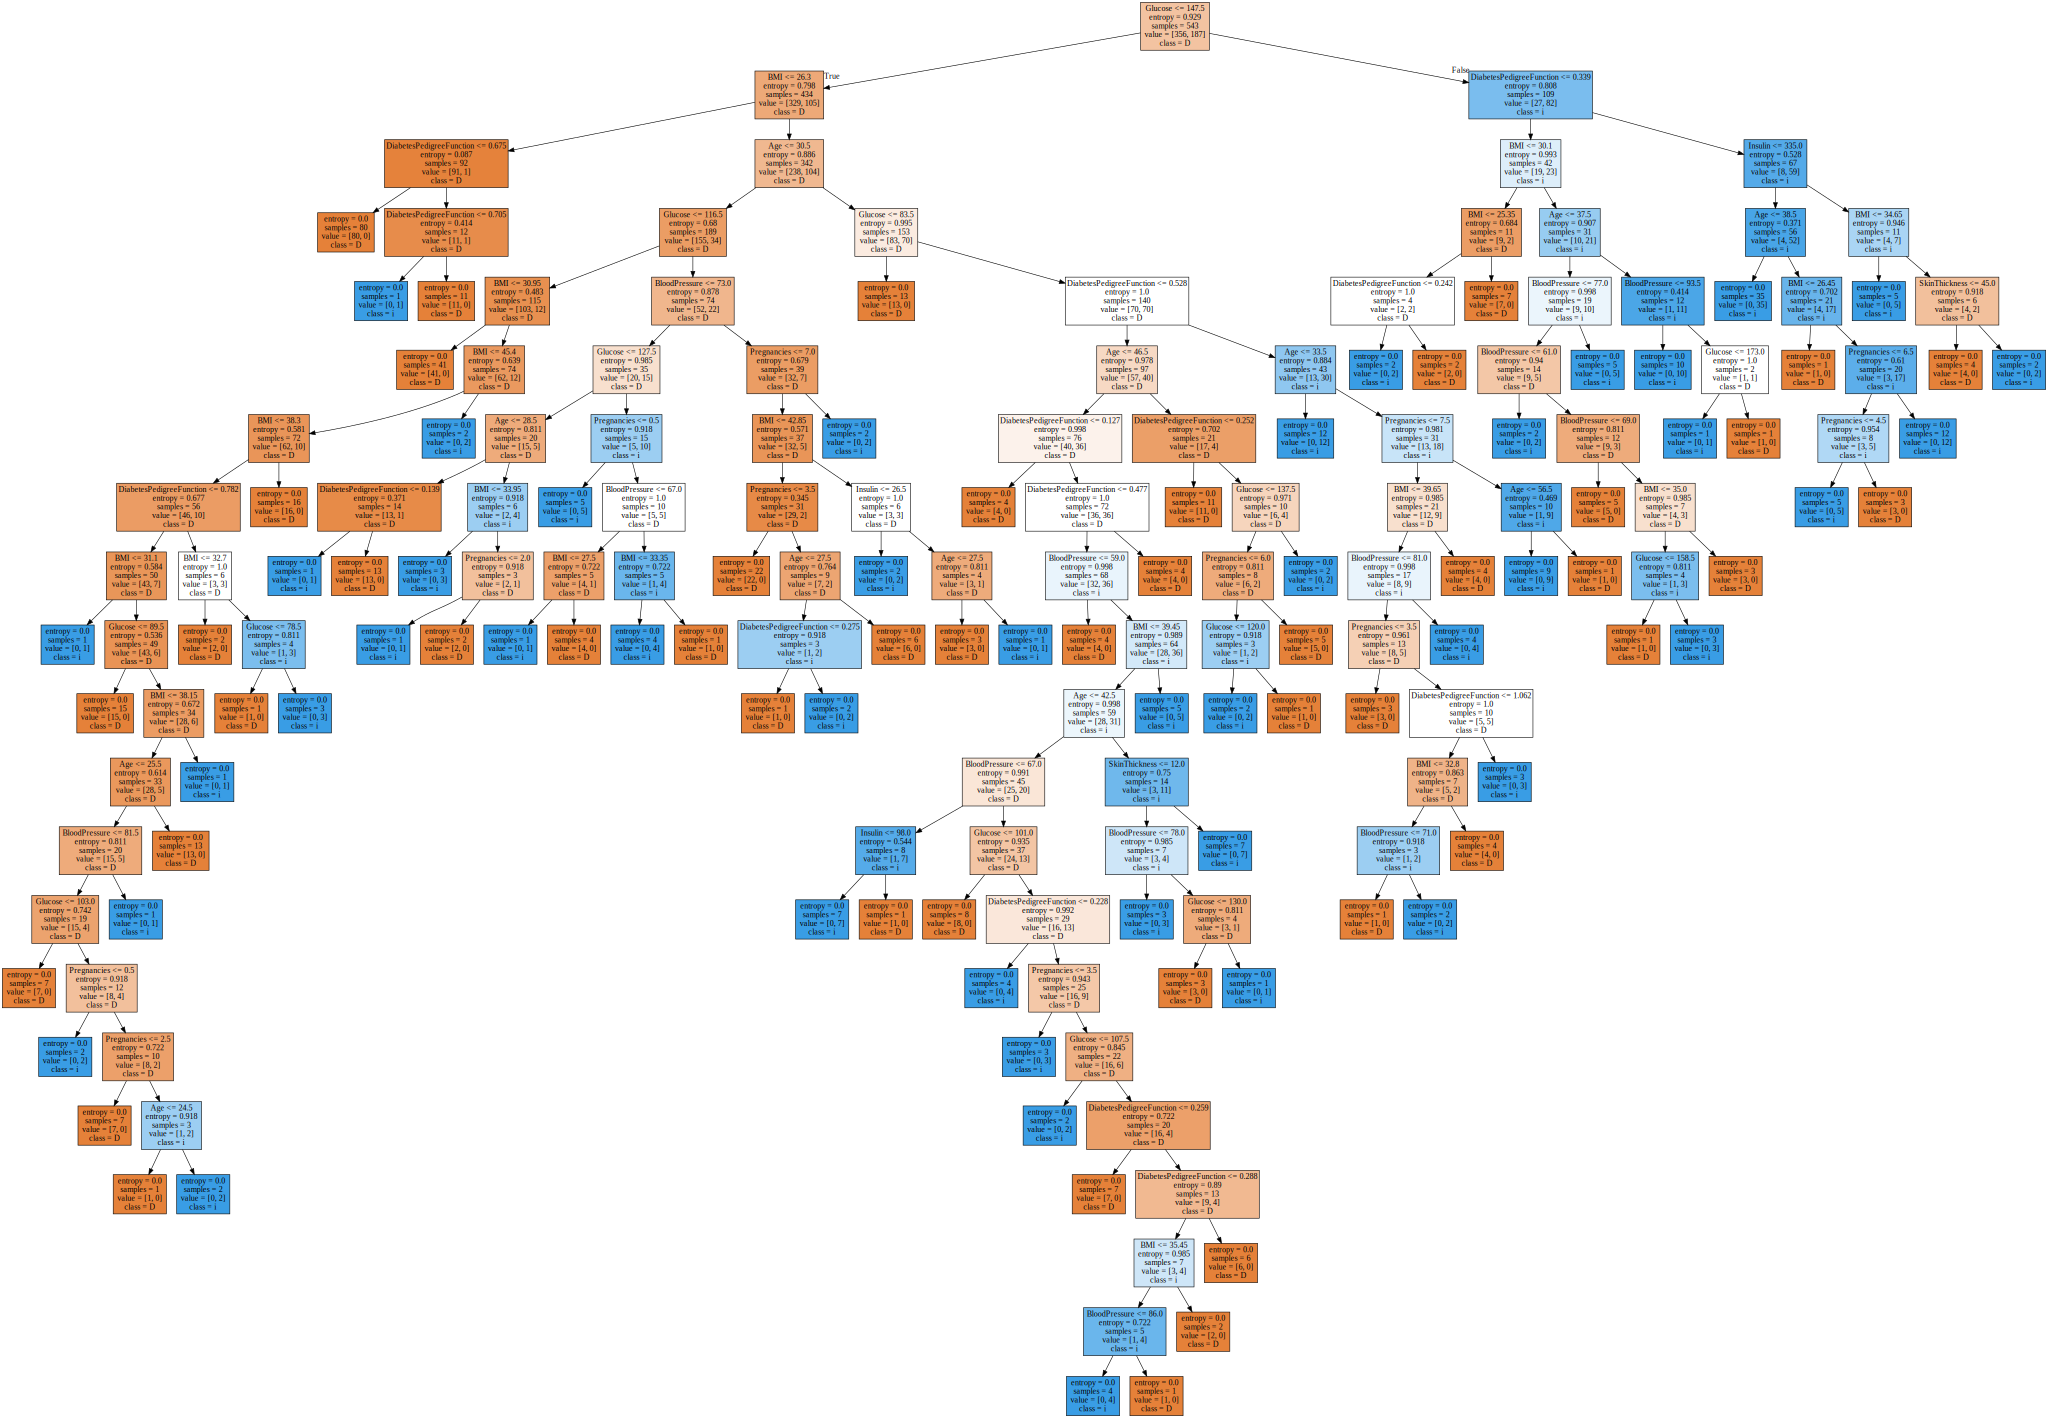

'decision_tree_graphivz.png'

In [76]:
# Importar libreria
import graphviz

# Exportar a DOT data
dot_data = tree.export_graphviz(algoritmo, out_file=None, 
                                feature_names=X.columns,  
                                class_names=y.name,
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
display(graph)

# Guardar imagen del árbol de decisión en png
graph.render("decision_tree_graphivz")

# M4 Actividad 1 - Evaluación de Modelos de Clasificación

### **Ejercicio - Clasificando SPAM**

In [32]:
import pandas as pd

In [53]:
# Se crea la base de datos que se usó para el ejercicio
columnsnames = ['ID', 'Clase', 'Pred.']
dataEjem = pd.DataFrame([[1, 'spam', 'ham'], [2, 'spam', 'ham'],
                              [3, 'ham', 'ham'], [4, 'spam', 'spam'],   
                              [5, 'ham', 'ham'], [6, 'spam', 'spam'],                              
                              [7, 'ham', 'ham'], [8, 'spam', 'spam'],
                              [9, 'spam', 'spam'], [10, 'spam', 'spam'],
                              [11, 'ham', 'ham'], [12, 'spam', 'ham'],
                              [13, 'ham', 'ham'], [14, 'ham', 'ham'],
                              [15, 'ham', 'ham'], [16, 'ham', 'ham'],
                              [17, 'ham', 'spam'], [18, 'spam', 'spam'],
                              [19, 'ham', 'ham'], [20, 'ham', 'spam']],
                              columns = columnsnames)

# La columna 'ID' se hace índice usando set_index
dataEjem.set_index('ID', inplace = True)

# Se despliega el dataframe
dataEjem

,Clase,Pred.
ID,,
1,spam,ham
2,spam,ham
3,ham,ham
4,spam,spam
5,ham,ham
6,spam,spam
7,ham,ham
8,spam,spam
9,spam,spam


Cambiando los datos categóricos a numéricos:

- 'Spam' = **1**
- 'Ham' = **2**

In [54]:
dataEjem['Clase'] = dataEjem['Clase'].replace(['spam', 'ham'], [1, 2])
dataEjem['Pred.'] = dataEjem['Pred.'].replace(['spam', 'ham'], [1, 2])

# Se imprime el dataframe
dataEjem

,Clase,Pred.
ID,,
1,1,2
2,1,2
3,2,2
4,1,1
5,2,2
6,1,1
7,2,2
8,1,1
9,1,1


Se verifican los resultados del ejercicio usando la librería *sklearn*:

**A) Se calcula la matriz de confusión**

In [55]:
y_pred = dataEjem['Pred.'].to_numpy()
y_test = dataEjem['Clase']

In [56]:
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix

cf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cf_matrix)

[[6 3]
 [2 9]]


**B) Calcule la tasa de aciertos (exactitud/accuracy)**

In [57]:
# Exactitud
exactitud = accuracy_score(y_test, y_pred)
print(exactitud)

0.75


**C) Calcule la Precisión**

In [58]:
# Precisión
from sklearn import metrics

print('¿Qué proporción de los clasificados como SPAM lo son realmente?')
precision = metrics.precision_score(y_test, y_pred)
print(precision)

¿Qué proporción de los clasificados como SPAM lo son realmente?
0.75


**D) Calcule la Sensibilidad/Recall**

In [59]:
# Sensibilidad - recall
print('¿Qué proporción de los que son SPAM se clasifican como tal?')
sensibilidad = metrics.recall_score(y_test, y_pred)
print(sensibilidad)

¿Qué proporción de los que son SPAM se clasifican como tal?
0.6666666666666666


**E) Calcule la medida F1-score**

In [60]:
cf_matrix[1,0] / ((1/precision) + (1/sensibilidad))

0.7058823529411765

**F) Calcule la Especificidad (FPR)**

In [61]:
cf_matrix[1,1] / (cf_matrix[1,1] + cf_matrix[1,0])

0.8181818181818182

### Se agregan para varios modelos el cálculo de las diferentes métricas

Como se indica en el tutorial de predicción de diabetes en la página https://www.ritchieng.com/machine-learning-evaluate-classification-model/ (se explican en el punto 5 (confusion_matrix).

In [62]:
# Se eliminan las filas que tengan cero en 'BloodPreassure', 'BMI' y 'Glucose'
diabetes_mod = diabetes[(diabetes.BloodPressure != 0) & (diabetes.BMI != 0) & (diabetes.Glucose != 0)]
print(diabetes_mod.shape)

# Se separa el conjunto de datos: características(X) y la respuesta a predecir(y)
feature_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
X = diabetes_mod[feature_names]
y = diabetes_mod.Diabetes

(724, 9)


**Modelos a usar:**

In [63]:
# Se importan librerías y los clasificadores
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# Se inicializan los clasificadores con sus parámetros determinados y añadir cada uno a la lista de modelos
models = []
models.append(('K-Nearest Neighbors (K-NN)', KNeighborsClassifier()))
models.append(('Support Vector Classifier (SVC)', SVC()))
models.append(('Regresión Logística (LR)', LogisticRegression()))
models.append(('Árboles de Decisión', DecisionTreeClassifier()))

In [80]:
# Se separan las características y respuesta
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = diabetes_mod.Diabetes, random_state=0)

# Se ajusta cada modelo en un bucle y se calcula la precisión del modelo respectivo utilizando "accuracy_score".
names = []
scores = []

datas = [[],[],[],[]]
count = 0

for name, model in models:
    print('\n\n')
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
   # scores.append(accuracy_score(y_test, y_pred))
   # names.append(name)
    print('------Modelo: ', name, '------\n')
    print('Matriz de confusión ->')
    print(metrics.confusion_matrix(y_test, y_pred))
    print('\n')
    
    # save confusion matrix and slice into four pieces
    conf = metrics.confusion_matrix(y_test, y_pred)
    #[row, column]
    TP = conf[1, 1]
    TN = conf[0, 0]
    FP = conf[0, 1]
    FN = conf[1, 0]
    print('Métricas calculadas a partir de una matriz de confusión ->')
    
    # Classification Accuracy
    print('Exactitud: ', (TP + TN) / float(TP + TN + FP + FN))
    print('Exactitud con metrics: ', metrics.accuracy_score(y_test, y_pred))
    datas[count].append((TP + TN) / float(TP + TN + FP + FN))
    datas[count].append(metrics.accuracy_score(y_test, y_pred))

    # Classification Error
    print('Error de clasificación: ', (FP + FN) / float(TP + TN + FP + FN))
    print('Error de clasificación con metrics:' , 1 - metrics.accuracy_score(y_test, y_pred))
    datas[count].append((FP + FN) / float(TP + TN + FP + FN))
    datas[count].append(1 - metrics.accuracy_score(y_test, y_pred))
    
    #Sensitivity
    r = TP / float(FN + TP)
    print('Sensitividad: ', TP / float(FN + TP))
    print('Sensitividad con metrics: ', metrics.recall_score(y_test, y_pred))
    datas[count].append(TP / float(FN + TP))
    datas[count].append(metrics.recall_score(y_test, y_pred))
    
    # Specificity
    print('Especificidad: ', TN / (TN + FP))
    datas[count].append(TN / (TN + FP))
    
    # False Positive Rate
    print('Tasa de falsos positivos: ', FP / float(TN + FP))
    datas[count].append(FP / float(TN + FP))
    
    # Precision
    p = metrics.precision_score(y_test, y_pred)
    print('Precisión: ', metrics.precision_score(y_test, y_pred))
    datas[count].append(metrics.precision_score(y_test, y_pred))
    
    # F1-score
    print('F1-score: ', 2 / ((1/p) + (1/r)))
    datas[count].append(2 / ((1/p) + (1/r)))
    
    # Curva ROC
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
    datas[count].append(fpr)
    datas[count].append(tpr)
    datas[count].append(thresholds)
    
    # AUC
    AUC = metrics.roc_auc_score(y_test, y_pred)
    datas[count].append(AUC)
    
    count = count+1
    
tr_split = pd.DataFrame({'Name': names, 'Score': scores})




------Modelo:  K-Nearest Neighbors (K-NN) ------

Matriz de confusión ->
[[100  19]
 [ 30  32]]


Métricas calculadas a partir de una matriz de confusión ->
Exactitud:  0.7292817679558011
Exactitud con metrics:  0.7292817679558011
Error de clasificación:  0.27071823204419887
Error de clasificación con metrics: 0.27071823204419887
Sensitividad:  0.5161290322580645
Sensitividad con metrics:  0.5161290322580645
Especificidad:  0.8403361344537815
Tasa de falsos positivos:  0.15966386554621848
Precisión:  0.6274509803921569
F1-score:  0.5663716814159292



------Modelo:  Support Vector Classifier (SVC) ------

Matriz de confusión ->
[[105  14]
 [ 33  29]]


Métricas calculadas a partir de una matriz de confusión ->
Exactitud:  0.7403314917127072
Exactitud con metrics:  0.7403314917127072
Error de clasificación:  0.2596685082872928
Error de clasificación con metrics: 0.2596685082872928
Sensitividad:  0.46774193548387094
Sensitividad con metrics:  0.46774193548387094
Especificidad:  0.8823

### Comparación en una tabla de valores

Se compara en una tabla los valores obtenidos por cada modelo.

In [78]:
data = {'K-NN': datas[0],
        'SVC': datas[1],
        'LR': datas[2],
        'TREE': datas[3]
        }
dfMetrics = pd.DataFrame(data, index=['Exactitud','Exactitud con metrics','Error de clasificación',
                                     'Error de clasificación con metrics','Sensibilidad',
                                     'Sensitividad con metrics','Especificidad','Tasa de falsos positivos',
                                     'Precisión', 'F1-score','fpr','tpr','thresholds','AUC'])
dfMetrics

,K-NN,SVC,LR,TREE
Exactitud,0.729282,0.740331,0.762431,0.756906
Exactitud con metrics,0.729282,0.740331,0.762431,0.756906
Error de clasificación,0.270718,0.259669,0.237569,0.243094
Error de clasificación con metrics,0.270718,0.259669,0.237569,0.243094
Sensibilidad,0.516129,0.467742,0.596774,0.612903
Sensitividad con metrics,0.516129,0.467742,0.596774,0.612903
Especificidad,0.840336,0.882353,0.848739,0.831933
Tasa de falsos positivos,0.159664,0.117647,0.151261,0.168067
Precisión,0.627451,0.674419,0.672727,0.655172
F1-score,0.566372,0.552381,0.632479,0.633333


**¿Cuál mayor exactitud?**

La regresión logística mostro una mayor exactitud de 0.7624

**¿Cuál permite obtener mejor precisión?**

El Support Vector Classifier mostro una mayor presición pero la regresión logistica se acerco casí lo mismo.

**¿Cuál mejor sensibilidad?**

Tanto los Árboles de Decisión como la regresión logistica tienen la misma sensibilidad.

**¿Mejor factor F1?**

La regresión logística mostro un mejor factor F1.

### Curvas ROC y métricas AUC

### ROC

In [72]:
# Definir variables
    # Modelo 1
fpr1 = datas[0][10]
tpr1 = datas[0][11]
thresholds1 = datas[0][12]

    # Modelo 2
fpr2 = datas[1][10]
tpr2 = datas[1][11]
thresholds2 = datas[0][12]

    # Modelo 3
fpr3 = datas[2][10]
tpr3 = datas[2][11]
thresholds3 = datas[0][12]

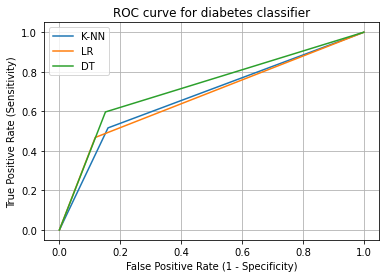

In [73]:
# Generar gráfico

plt.plot(fpr1, tpr1, label='K-NN')
plt.plot(fpr2, tpr2, label='LR')
plt.plot(fpr3, tpr3, label='DT')

plt.title('ROC curve for diabetes classifier') 
plt.xlabel('False Positive Rate (1 - Specificity)') 
plt.ylabel('True Positive Rate (Sensitivity)') 
plt.legend()
plt.grid(True)
plt.show()

### AUC

In [74]:
# Definir variables
    # Modelo 1
AUC1 = datas[0][13]

    # Modelo 2
AUC2 = datas[0][13]

    # Modelo 3
AUC3 = datas[0][13]

In [75]:
# Comparación
comp = {'K-NN': datas[0][13], 
       'LR': datas[1][13], 
       'TREE': datas[2][13]}
tabla = pd.DataFrame(comp, index=['AUC'])
tabla

,K-NN,LR,TREE
AUC,0.678233,0.675047,0.722757


### Conclusiones

Me gusto mucho esta actividad por que visualice como los modelos son mejores dependiendo de las metricas que se medieron.